<a href="https://colab.research.google.com/github/Adn02/Intro-to-ML/blob/main/Homework/HW2/HW2Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries and Housing Dataset**

In [333]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/Adn02/Intro-to-ML/main/Datasets/Housing.csv"
hf = pd.read_csv(url)

**Pre-processing with Normalization/Standardization**

In [334]:
variable_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_mapping(x):
  return x.map({'no' : 0, 'yes' : 1})

hf[variable_list] = hf[variable_list].apply(binary_mapping)
hf = hf.drop('furnishingstatus', axis=1)

np.random.seed(1)
df_training, df_validation = train_test_split(hf, train_size = 0.8, test_size = 0.2, random_state = 100)

# Three separate dataframes, df, normalized, and standardized
norm_training, norm_validation = df_training, df_validation
std_training, std_validation = df_training, df_validation

normalize = MinMaxScaler()
norm_training = normalize.fit_transform(norm_training)
norm_validation = normalize.fit_transform(norm_validation)

standardize = StandardScaler()
std_training = standardize.fit_transform(std_training)
std_validation = standardize.fit_transform(std_validation)

# Convert Normalized Training and Validation set back to dataframe for training model algorithm
norm_training = pd.DataFrame(norm_training, columns=df_training.columns)
norm_validation = pd.DataFrame(norm_validation, columns=df_validation.columns)

# Convert Standardized Training and Validation set back to dataframe for training model algorithm
std_training = pd.DataFrame(std_training, columns=df_training.columns)
std_validation = pd.DataFrame(std_validation, columns=df_validation.columns)

# Outputs
y_train = df_training.pop('price')
y_valid = df_validation.pop('price')

# Normalized Outputs
norm_y_train = norm_training.pop('price')
norm_y_valid = norm_validation.pop('price')

# Standardized Outputs
std_y_train = std_training.pop('price')
std_y_valid = std_validation.pop('price')

**Training and Validation Algorithm**

In [335]:
def train_model(inputs, x_training, x_validation, y_train, y_valid, learning_rate, iterations):
    training_inputs = x_training[inputs]
    x_train = np.c_[np.ones((len(training_inputs), 1)), training_inputs]

    validation_inputs = x_validation[inputs]
    x_valid = np.c_[np.ones((len(validation_inputs), 1)), validation_inputs]

    n = x_train.shape[1]
    m_train = len(x_train)
    m_valid = len(x_valid)
    theta = np.zeros(n)

    train_losses = []
    valid_losses = []

    for i in range(iterations):
        h_theta = x_train.dot(theta)
        error = np.subtract(h_theta, y_train)
        gradient = (1 / m_train) * (x_train.transpose().dot(error))

        theta -= (learning_rate * gradient)

        train_loss = 1 / (2 * m_train) * np.sum(np.square((h_theta - y_train)))
        valid_loss = 1 / (2 * m_valid) * np.sum(np.square((x_valid.dot(theta) - y_valid)))

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

    return train_losses, valid_losses

**Problem 2 Part A**

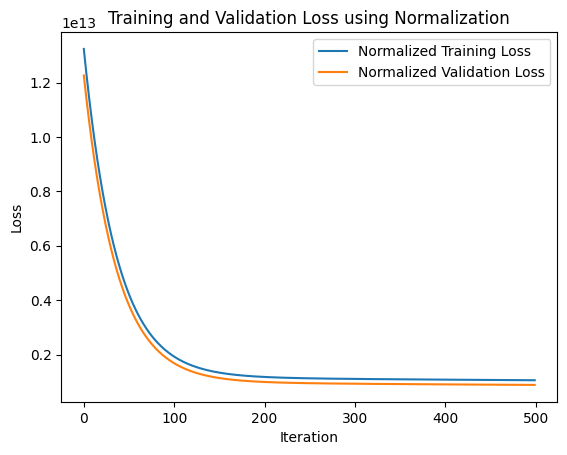

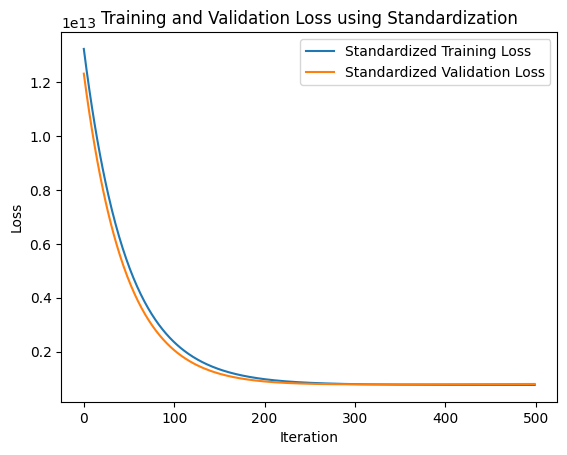

In [336]:
inputs = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
learning_rate = 0.01
iterations = 500

# Training with normalized inputs
norm_train_losses, norm_valid_losses = train_model(inputs, norm_training, norm_validation, y_train, y_valid, learning_rate, iterations)
# Training with standardized inputs
std_train_losses, std_valid_losses = train_model(inputs, std_training, std_validation, y_train, y_valid, learning_rate, iterations)

# Plot the losses
plt.plot(norm_train_losses, label="Normalized Training Loss")
plt.plot(norm_valid_losses, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss using Normalization")
plt.show()

plt.plot(std_train_losses, label="Standardized Training Loss")
plt.plot(std_valid_losses, label="Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss using Standardization")
plt.show()

**Problem 2 Part B**

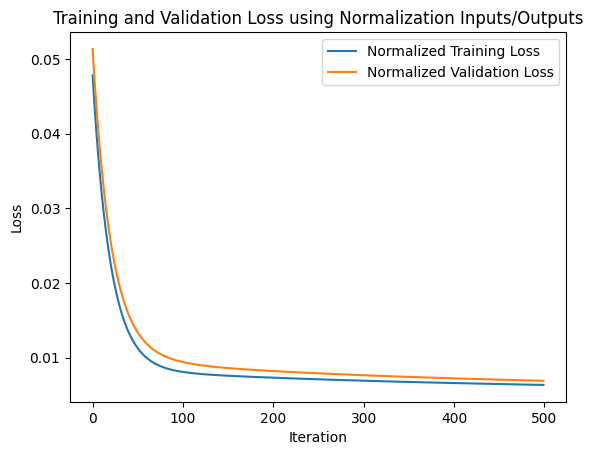

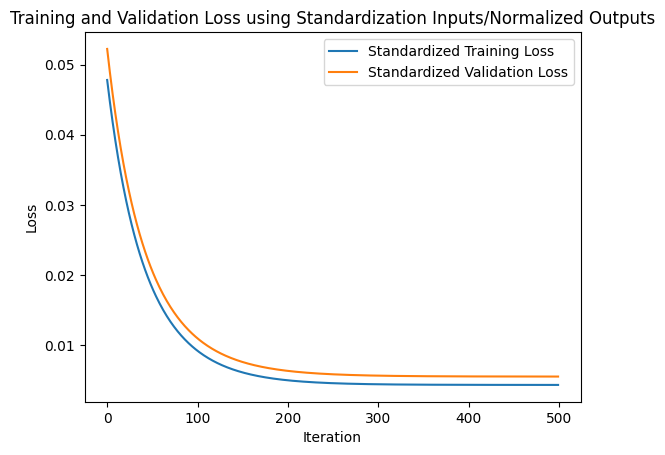

In [337]:
# Include all inputs except for furnishingstatus
inputs = norm_training.columns.tolist()
learning_rate = 0.01
iterations = 500

# Training with normalized inputs and outputs
norm_train_losses, norm_valid_losses = train_model(inputs, norm_training, norm_validation, norm_y_train, norm_y_valid, learning_rate, iterations)
# Training with standardized inputs and normalized outputs
std_train_losses, std_valid_losses = train_model(inputs, std_training, std_validation, norm_y_train, norm_y_valid, learning_rate, iterations)

# Plot the losses
plt.plot(norm_train_losses, label="Normalized Training Loss")
plt.plot(norm_valid_losses, label="Normalized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss using Normalization Inputs/Outputs")
plt.show()

plt.plot(std_train_losses, label="Standardized Training Loss")
plt.plot(std_valid_losses, label="Standardized Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss using Standardization Inputs/Normalized Outputs")
plt.show()